## **Цель проекта**

Анализ сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Целью данного проекта является определение рыночной стоимости объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Ход исследования**

Вначале мы получим данные и ознакомимся с целью проекта. Далее мы проанализируем полученные данные на ошибки, приведем их к виду, который можно анализировать, а именно, удалим явные и неявные дубликаты, заполним пропуски, переименнуем стобцы и прочее, если необходимо.
После подготовки данных для анализа начнем выполнять сам анализ. Проверяем различные гипотезы до тех пор пока не найдем верную. На основании полученных данных сделаем вывод.

Таким образом, исследование пройдёт в три этапа:

Обзор данных.
Предобработка данных.
Проверка гипотез.

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## **Предобработка данных**

### **Знакомство с данными для анализа**
Вначале знакомимся со структурой данных для анализа, а также типом данных. Для этого смотрим первые 10 строк и информацию о типах данных полученного файла.

In [1]:
import pandas as pd
import numpy as np

import os

pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### **Определение и изучение пропущенных значений**

Для работы с пропущенными значениями сначало выведем на экран количество пропущенных значений.

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### **Замена пропущенных значений**

Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. 

In [4]:
#замена пропущенных значений числа балконов,удаленности от аэропорта, удаленности от центра города, числа и удаленности парков и прудов на 0. Если данные не заполнены, то, скорее всего, их просто нет. Причиной пропуска данных могло быть отсутствие в понимании заполняющего необходимости заполнения данных, которых нет.

data['balcony']= data['balcony'].fillna(0)    
data['balcony'].isna().sum()

0

In [5]:
#заменим пропущенные значения в living_area и kitchen_area
#Сначало сделаем предподожение, что в случае студии living_area = total_area, kitchen_area=0
data['living_area'] = np.where(data['studio'] == 'True', data['total_area'], data['living_area'])
data['kitchen_area'] = np.where(data['studio'] == 'True', 0, data['kitchen_area'])
data[['living_area','kitchen_area']].isna().sum()                       
                           

living_area     1903
kitchen_area    2278
dtype: int64

In [6]:
#количество пропущенных значений не изменилось, т.е. все пропущенные значения  в living_area и kitchen_area относятся к квартирам.
#тогда заменяем медианой пропущенные значения kitchen_area, а living_area вычисляем как living_area=(total_area-kitchen_area)/rooms

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].isna().sum()

0

In [7]:
data['living_area'] = data['living_area'].fillna((data['total_area']-data['kitchen_area'] ))
print(data[['total_area','kitchen_area','rooms','living_area']].head(10))                           
data['living_area'].isna().sum()

   total_area  kitchen_area  rooms  living_area
0      108.00         25.00      3        51.00
1       40.40         11.00      1        18.60
2       56.00          8.30      2        34.30
3      159.00          9.10      3       149.90
4      100.00         41.00      2        32.00
5       30.40          9.10      1        14.40
6       37.30         14.40      1        10.60
7       71.60         18.90      2        52.70
8       33.16          8.81      1        15.43
9       61.00          6.50      3        43.60


0

In [8]:
#удалим все данные с пропущенными значениями locality_name, т.к. невозможно определить замену пропущенным данным, а данный показатель важен для определения рыночной стоимости, кроме того, их всего 49, т.е. очень мало, поэтому это не повлияет на наш анализ.

data = data.dropna(subset = ['locality_name'])

In [9]:
#замена пропущенных значений ceiling_height, на медиану. Замена на медиану, а не средними значениями, т.к. для широкого круга объектов вытота потолка некоторых объетов может существенно отличаться от основной массы, тогда среднее значение сильно сместит результат. Скорей всего, те, кто имеет высокие потолки, указали это в объявлениях. Остальные просто не сочли важным заполнение данной информации. Поэтому медиана вполне подойдет для пропущенных значений высоты потолка.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

#days_exposition— сколько дней было размещено объявление (от публикации до снятия). Скорее всего, данные не заполнены по причине того, что на дату выгрузки отчета объявления еще не были сняты с публикации. Оставим пропуски.

In [10]:
# смотрим: есть пропуски и тип float
display(data[['days_exposition']].info())
display(data[['days_exposition']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   days_exposition  20470 non-null  float64
dtypes: float64(1)
memory usage: 369.5 KB


None

days_exposition    3180
dtype: int64

In [11]:
data['days_exposition_new'] = data['days_exposition'].convert_dtypes().astype('Int64')

display(data[['days_exposition_new']].info())
display(data[['days_exposition_new']].isnull().sum())

# как видим пропуски остались, а тип стал Int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   days_exposition_new  20470 non-null  Int64
dtypes: Int64(1)
memory usage: 392.6 KB


None

days_exposition_new    3180
dtype: int64

In [12]:
data[['days_exposition_new']].head(3)

,days_exposition_new
0,<NA>
1,81
2,558


In [13]:
# отсутствие общего количества этажей заменим на медиану по району, т.к. в районах обычно этажность домов примерно одинаковая.

data['floors_total'] = data['floors_total'].fillna(data.groupby(['locality_name'])['floors_total'].transform('median'))
print(data['floors_total'].isna().sum())

#проверяем условие, что этаж объектав объявлении невыше количества этажей в доме.

a = data['floors_total'] < data['floor']
print(a.value_counts())   

0
False    23618
True        32
dtype: int64


In [14]:
#после проверки получили, что есть этажи в объявление, которые выше, чем количество этажей в доме (32 штуки). Поэтому заменим количество этажей в доме на этаж в объявлении в случае, если этаж объекта выше общего количества этажей в доме.

data['floors_total'] = np.where(data['floors_total'] < data['floor'], data['floor'], data['floors_total'])

#проверка:
b = data['floors_total'] < data['floor']
print(b.value_counts())


False    23650
dtype: int64


In [15]:
#заменим пропущенные значения 'airports_nearest','cityCenters_nearest' на медиану, расчитанную по названию населенного пункта, полагая, что населенные пункты имеют небольшую территория и, взяв медиану, погрешность будет небольшой.

data[
    ['airports_nearest',
     'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']
] = data[
    ['airports_nearest',
     'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']
].fillna(data.groupby(['locality_name'])[['airports_nearest',
     'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest']].transform('median'))
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5386
cityCenters_nearest      5386
parks_around3000         5386
parks_nearest            5998
ponds_around3000         5386
ponds_nearest            5494
days_exposition          3180
days_exposition_new      3180
dtype: int64

Данной обработкой получилось заменить не все пропущенные данные, но большую часть. 

Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. 

### **Перевод значений в другой тип данных**

<a id='Перевод значений в другой тип данных'></a>

In [16]:
#Приведите данные к нужным типам

#'floors_total', 'balcony','days_exposition' заменим на целые числа, т.к. логично, что данные показатели не могут быть дробными.
#data['days_exposition'] = pd.to_numeric(data['days_exposition'],errors='coerce').astype('int')
data[['floors_total', 'balcony']] = data[['floors_total','balcony']].astype('int')

#'is_apartment' заменим на булевые значения, т.к. значения в этой колонке должно быть или True, или False
data['is_apartment'] = data['is_apartment'].astype('bool', errors='ignore')

#'first_day_exposition' заменим на формат даты-время, т.к. в столбце указана дата и время
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

data.info() #выведем данные после преобразования

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### **Работа с дубликатами**

#### Поиск явных дубликатов

In [17]:
print(data.duplicated().sum())

0


#### Поиск неявных дубликатов

In [18]:
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [19]:
def replace_words(wrong_words, correct_word):
    for wrong_word in wrong_words:
        data['locality_name'] = data['locality_name'].str.replace(wrong_word, correct_word) 

duplicates = ['ё'] 
word = 'е' 
replace_words(duplicates, word)
duplicates = ['поселок городского типа','коттеджный поселок']
word = 'поселок'
replace_words(duplicates, word)
#duplicates = ['ïîï']
#genre = 'unknown'
replace_words(duplicates, word)


#data['locality_name'] = data['locality_name'].str.replace("ё", "е")
#data['locality_name'] = data['locality_name'].str.replace("поселок городского типа", "поселок")
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор'
 'Гатчина' 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 

В результате анализа дубликатов было преобразовано 34 названия (364-328).

### **Расчет и добавление дополнительных данных в таблицу**

#### Цена квадратного метра

In [20]:
data['price_per_square_m'] = data['last_price'] / data['total_area']

#### День недели, месяц и год публикации объявления

<a href='#Перевод значений в другой тип данных'>Link to Перевод значений в другой тип данных'</a>

#### Этаж квартиры (варианты — первый, последний, другой)

In [21]:
data['floor_groups'] = np.where(data['floors_total'] == data['floor'], 'last', np.where(data['floor'] == 1, 'first', 'other'))
print(data.groupby('floor_groups')['floor_groups'].count())

floor_groups
first     2887
last      3392
other    17371
Name: floor_groups, dtype: int64


#### Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [22]:
data['square_convertion'] = data['living_area'] / data['total_area']
data['kitchen_convertion'] = data['kitchen_area'] / data['total_area']

In [23]:
data[['price_per_square_m', 'floor_groups','square_convertion','kitchen_convertion']].head()

,price_per_square_m,floor_groups,square_convertion,kitchen_convertion
0,120370.370370,other,0.472222,0.231481
1,82920.792079,first,0.460396,0.272277
2,92785.714286,other,0.612500,0.148214
3,408176.100629,other,0.942767,0.057233
4,100000.000000,other,0.320000,0.410000


## **Исследовательский анализ данных**

### **Изучение следующих параметров: площадь, цена, число комнат, высота потолков.**

900.0


<AxesSubplot:>

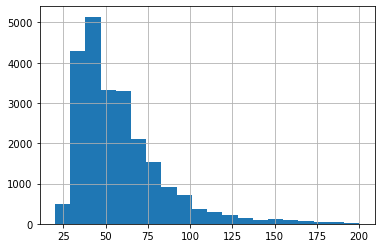

In [24]:
print(data['total_area'].max())
data['total_area'].hist(bins=20, range=(20,200))

Наиболее часто продают объекты площадью от 30 до 65 кв.м. Площать-меньше 20 кв.м и больше 175 кв.м.очень редкие, их можно удалить.

бизнес-класс                 11690
элитная недвижимость          8888
комфорт                       1651
эксклюзивная недвижимость      938
эконом                         169
Name: type_estate_meter, dtype: int64


<AxesSubplot:title={'center':'price_per_square_m'}, ylabel='Frequency'>

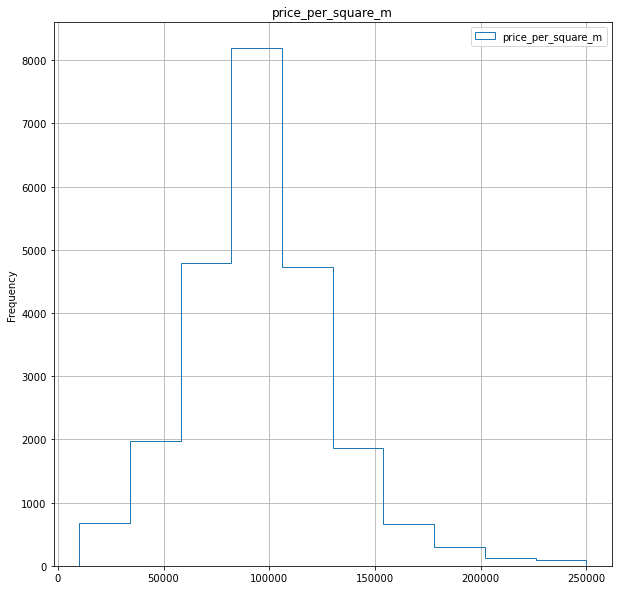

In [25]:
def price_meter_groups(price):
    if price > 170001:
        return 'эксклюзивная недвижимость'
    if price < 170000 and price > 100001:
        return 'элитная недвижимость'
    if price < 100000 and price > 50001:
        return 'бизнес-класс'
    if price < 50000 and price > 20001:
        return 'комфорт'
    if price < 20000 and price > 0:
        return 'эконом'
data['type_estate_meter'] = data['price_per_square_m'].apply(price_meter_groups)
print(data['type_estate_meter'].value_counts())
data.plot(kind='hist', y='price_per_square_m', x='type_estate_meter', figsize=(10,10),histtype='step', range=(10000,250000), legend=True, grid=True, title='price_per_square_m')

<AxesSubplot:>

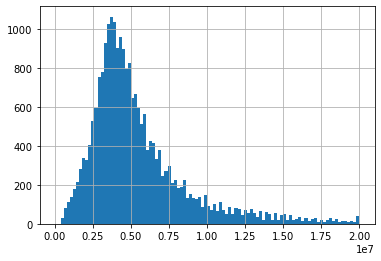

In [26]:
data['last_price'].hist(bins=100, range=(0,20000000))

Вначале мы сгруппировали цены по группам. Из группировок сразу поняли, что наибольшее число квартир в диапозоне от 0 до 10 млн руб. Именно по этому диапазону построили гистограмму. Уже по гистограмме можно сделать вывод, что наибольшее количество квартир с ценой кв.м. от 80 до 105 тыс.руб. 
Цена за кв.м. более 200 тыс руб и менее 20 тыс.руб. очень редка, поэтому данные значения можно удалить из анализа.

<AxesSubplot:>

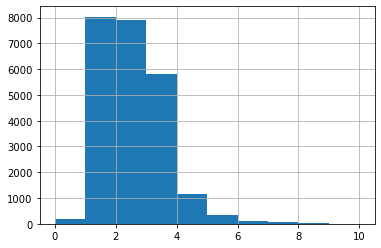

In [27]:
data['rooms'].hist(bins=10, range=(0,10))

По гистограмме видно, что чаще всего продают 1-х, 2-х и 3-х комнатные квартиры.

<AxesSubplot:>

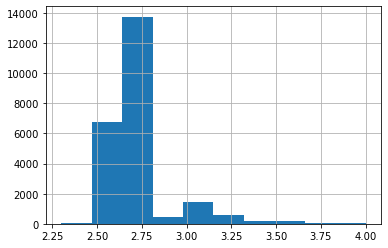

In [28]:
data['ceiling_height'].hist(bins=10, range=(2.3,4))

По гистограмме видно, что чаще всего продают квартиры с высотой потолков от 2.65 до 2.8 метра.

### **Изучение времени продажи квартиры.**

In [29]:
#Построем гистограмму. Посчитайем среднее и медиану. Опишем, сколько обычно занимает продажа. Ответим на вопрос: "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

459.1000000000022

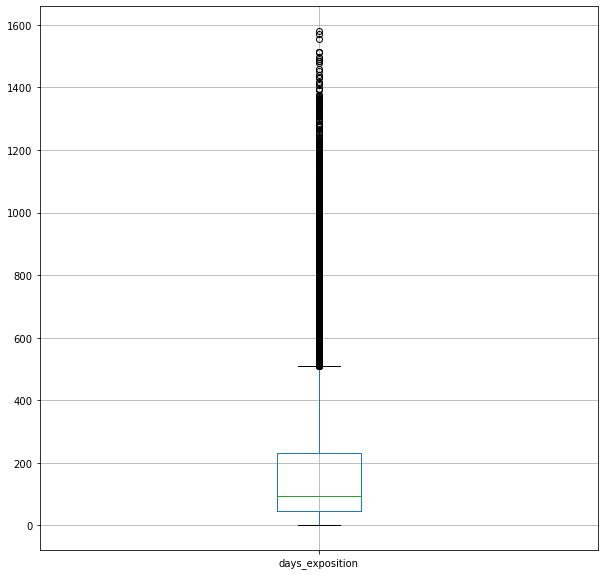

In [30]:
data.boxplot(['days_exposition'], figsize=(10,10))
data['days_exposition'].quantile(0.9)

In [31]:
print(data['days_exposition'].max())
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

1580.0
95.0
180.7531998045921


В среднем продажа квартиры занимает от 10 до 200 дней. Медиана - 95 дней, а среднее 181 дней.Если объект продали до медианы (73 дней), то можно считать, что продажи прошли очень быстро. Долгие продажи, например, те, что заняли более 459 дней. Максимальное время продажи- 1580 дней (это более 4 лет), такой срок продажи- необычно долгий, но и такое бывает, если продавать далеко не по рыночной цене.

<AxesSubplot:>

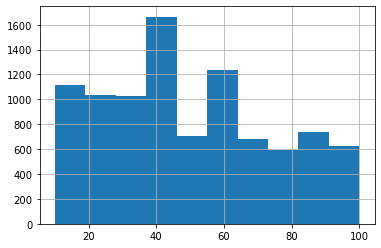

In [32]:
#укрупним график, рассмотрим его более пристально:
data['days_exposition'].hist(bins=10,range=(10,100))

В результате увидели аномаланые всплески на 45, 60, 90 днях. Это может быть связано со сроком размещения объявления, определяемым системой. Например, при первоначальном размещении объявление размещается на 45 дней. Затем необходимо ручное продлении. Продлевается срок до 60 дней, потом объявление снимается с публикации до того, пока его вновь не активируют в 90 дней. Т.е. в эти дни объявления снимаются с публикации автоматически, потом может их уже не продлевают, поэтому вплески.

### **Удаление редких и выбивающихся значений**

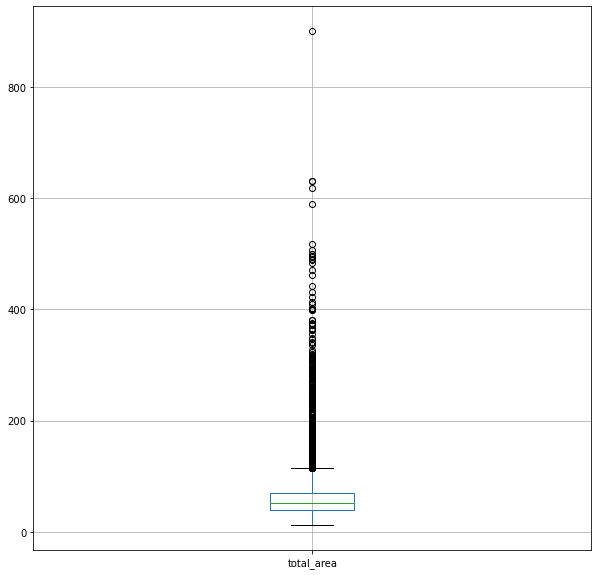

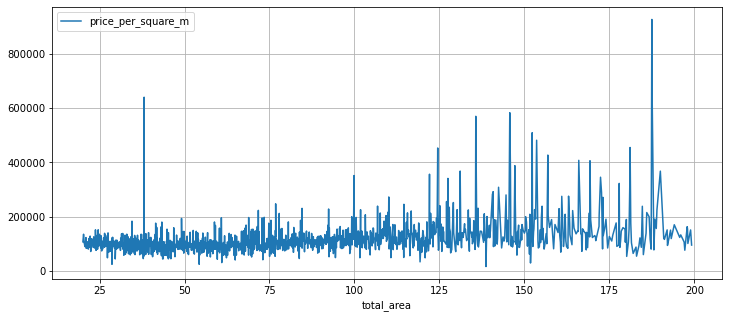

In [33]:
data['total_area'].describe()
data.boxplot(['total_area'], figsize=(10,10))
data['total_area'].quantile(0.9)
anomaly_total_area_0 = (
    data.query('total_area > 20 and total_area < 200')
    .pivot_table(index='total_area', values='price_per_square_m')
    .plot(grid=True, figsize=(12, 5))
) 

Сильные выбросы в районе 35-40 кв.м. и в районе 180-190 кв.м.

AxesSubplot(0.125,0.125;0.775x0.755)


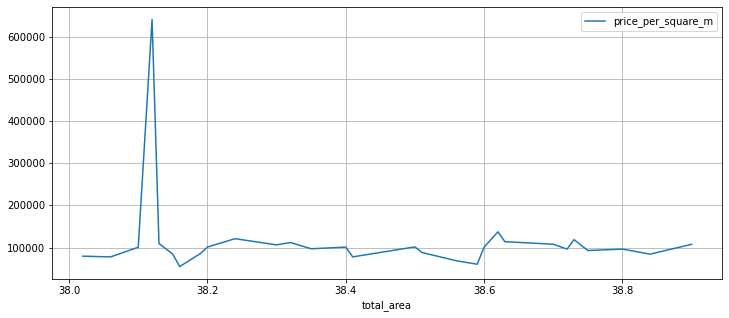

In [34]:
# определим выбросы. От них нужно будет потом избавиться.
anomaly_total_area_1 = (
    data.query('total_area > 38 and total_area < 39')
    .pivot_table(index='total_area', values='price_per_square_m')
    .plot(grid=True, figsize=(12, 5))
) 
print(anomaly_total_area_1)

AxesSubplot(0.125,0.125;0.775x0.755)


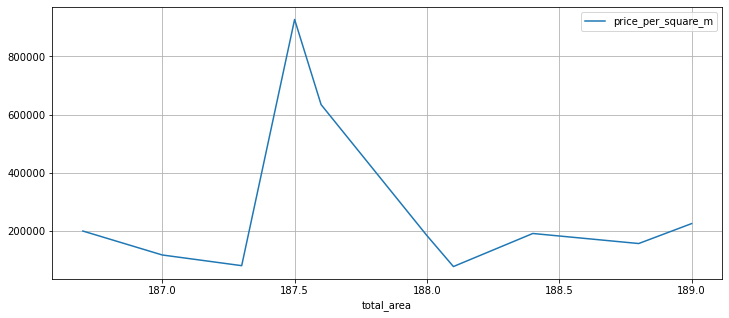

In [35]:
anomaly_total_area_2 = (
    data.query('total_area > 186 and total_area < 190')
    .pivot_table(index='total_area', values='price_per_square_m')
    .plot(grid=True, figsize=(12, 5))
) 
print(anomaly_total_area_2)

In [36]:
anomaly_area_price = data.query('total_area >38.1 and total_area < 38.2 or total_area == 187.5')
display(anomaly_area_price[['total_area','price_per_square_m','last_price']])

,total_area,price_per_square_m,last_price
2738,38.16,5.500000e+04,2098800.0
8170,38.19,8.588636e+04,3280000.0
9800,38.13,8.916863e+04,3400000.0
14761,38.15,6.500000e+04,2479750.0
16190,38.15,1.035387e+05,3950000.0
18873,187.50,3.120000e+05,58500000.0
21238,38.12,6.404224e+05,24412900.0
22519,38.13,1.298190e+05,4950000.0
22831,187.50,1.542605e+06,289238400.0


квартира с площадью 38.12 кв.м. с ценой кв.м.640 422 руб.и квартира с площадью 187.5 кв.м.и ценой кв.м.1 542 604.8-аномалии. Мы уже решили, что удалим редкие значения более 175 кв.м., а также с ценой кв.м. более 200 тыс.руб. Поэтому отдельно учитывать эти аномалии не будем.

In [37]:
#Исходя из гистограмм и графиков из раздела 3.1 и 3.2. определили наиболее редко встречающиеся данные.
#Удалим наиболее редко встречающиеся объекты, т.к. они не интересны для анализа средней ситуации на рынке.
#Удалим объекты со следующими параметрами:
#1. Площать-меньше 20 кв.м и больше 175 кв.м.
#2. Стоимостью кв.м.более 200 тыс.руб.и менее 20 тыс.руб.
#3. Комнат-менее 1 и более 6
#4. высотой потолка - менее 2,4 м и более 3,6 метров.
#5. Сроком продажи - более 425 дней.-Это 10% всех продаж, определенные нами, как очень длянные. Скорей всего,они имеют не рыночную цену, поэтому так долго продаются. А нам интересны рыночные значения. 

data_short = data.query('total_area > 20 and total_area < 175 \
and price_per_square_m > 20000 and price_per_square_m < 200000 \
and rooms >=1 and rooms <=6 \
and ceiling_height >2.4 and ceiling_height < 3.6 \
and days_exposition < 425'
)

data_short.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17162 entries, 1 to 23695
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17162 non-null  int64         
 1   last_price            17162 non-null  float64       
 2   total_area            17162 non-null  float64       
 3   first_day_exposition  17162 non-null  datetime64[ns]
 4   rooms                 17162 non-null  int64         
 5   ceiling_height        17162 non-null  float64       
 6   floors_total          17162 non-null  int32         
 7   living_area           17162 non-null  float64       
 8   floor                 17162 non-null  int64         
 9   is_apartment          17162 non-null  bool          
 10  studio                17162 non-null  bool          
 11  open_plan             17162 non-null  bool          
 12  kitchen_area          17162 non-null  float64       
 13  balcony         

Из 23650 объектов осталось только 20051. Это 85% от изначальной выборки. 15% отсеяли. Выборка осталась большой и без аномальных значений.

Изучим поведение трендов после удаления редких и аномальных данных

<AxesSubplot:ylabel='Frequency'>

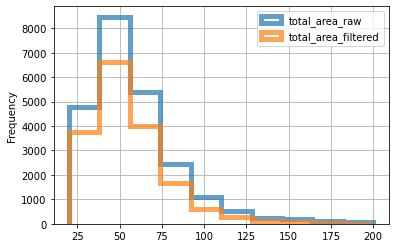

In [38]:
ax = data['total_area'].plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(20, 200),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='total_area_raw',
    legend=True,
)
data_short['total_area'].plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(20, 200),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='total_area_filtered',
    ax=ax,
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

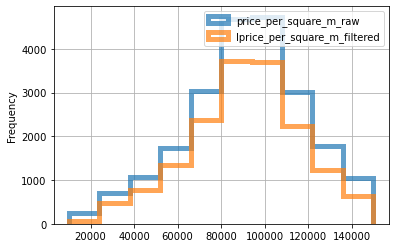

In [39]:
ax = data['price_per_square_m'].plot(
    kind='hist',
    y='price_per_square_m',
    histtype='step',
    range=(10000,150000),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='price_per_square_m_raw',
    legend=True,
)
data_short['price_per_square_m'].plot(
    kind='hist',
    y='price_per_square_m',
    histtype='step',
    range=(10000,150000),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='lprice_per_square_m_filtered',
    ax=ax,
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

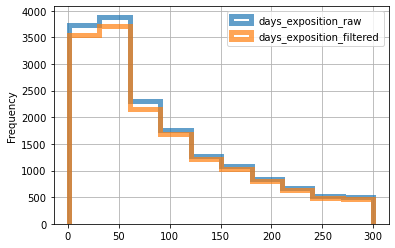

In [40]:
ax = data['days_exposition'].plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    range=(1, 300),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='days_exposition_raw',
    legend=True,
)
data_short['days_exposition'].plot(
    kind='hist',
    y='days_exposition',
    histtype='step',
    range=(1, 300),
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='days_exposition_filtered',
    ax=ax,
    grid=True,
    legend=True,
)

С удалением редких и аномальных данных тренды не поменялись.

### **Факторы, больше всего влияющие на стоимость квартиры**

In [41]:
col_ = ['total_area', 'last_price', 'rooms', 'days_exposition', 'ceiling_height','balcony']

for column in col_:
    correlation = round(data_short['last_price'].corr(data_short[column]),2)
    display(f'корреляция \'{column}\' равна {correlation}')


"корреляция 'total_area' равна 0.8"

"корреляция 'last_price' равна 1.0"

"корреляция 'rooms' равна 0.51"

"корреляция 'days_exposition' равна 0.08"

"корреляция 'ceiling_height' равна 0.39"

"корреляция 'balcony' равна 0.08"

Видим прямую зависимость цены продажи от площади, прямой зависимости цены от иных параметров не выявлено. Поэтому более детально
- Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 
- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
- Также изучим зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади, числа комнат, удалённости от центра.

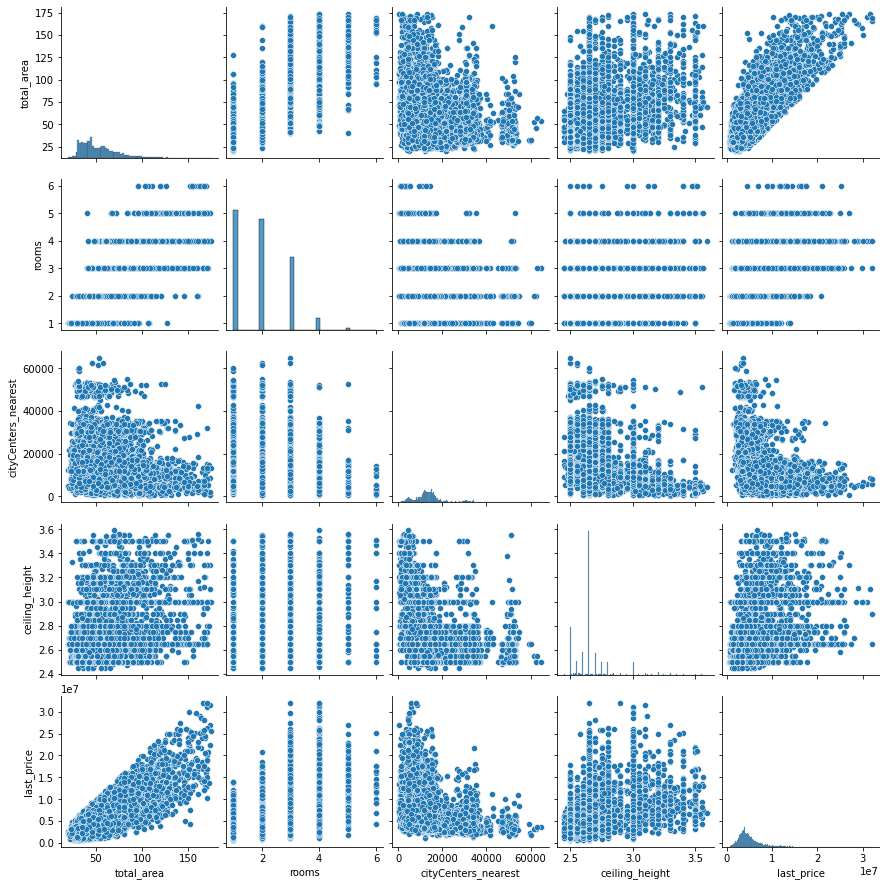

In [42]:
import seaborn

seaborn.pairplot(data_short[['total_area', 'rooms','cityCenters_nearest','ceiling_height','last_price']]) 

Итак, с ростом площади ростет цена, зависимость прямая. Чем дальше от центра, тем цена ниже. Чем больше комнат, тем дороже стоит квартира.Цена растет с увеличением высоты потолка.

In [43]:
#найдем среднии значения и медианы по ['total_area', 'rooms','cityCenters_nearest','last_price']
col_1 = ['total_area', 'rooms','cityCenters_nearest','ceiling_height','last_price']
for column in col_1:
    median_1 = data_short[column].median()
    mean_1 = data_short[column].mean()
    display(f'средняя \'{column}\' равна {median_1}')
    display(f'медиана \'{column}\' равна {mean_1}')

"средняя 'total_area' равна 49.875"

"медиана 'total_area' равна 54.944830439342546"

"средняя 'rooms' равна 2.0"

"медиана 'rooms' равна 1.9589791399603775"

"средняя 'cityCenters_nearest' равна 13512.0"

"медиана 'cityCenters_nearest' равна 14857.92491749175"

"средняя 'ceiling_height' равна 2.65"

"медиана 'ceiling_height' равна 2.670687565552126"

"средняя 'last_price' равна 4450000.0"

"медиана 'last_price' равна 5217196.347045799"

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

              mean_last_price  median_last_price
floor_groups                                    
first               4271678.0          3800000.0
last                4943226.0          4150000.0
other               5414039.0          4600000.0


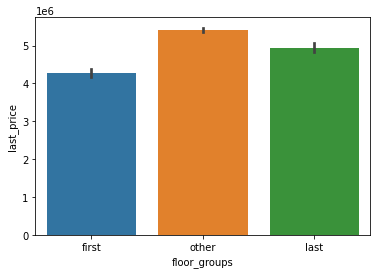

In [44]:
mean_last_price = round(data_short.groupby(['floor_groups']).agg({'last_price':['mean','median']}),0)
mean_last_price.columns = ['mean_last_price','median_last_price']
print(mean_last_price)
seaborn.barplot(x=data_short['floor_groups'], y = data_short['last_price']);

Самые дешевые квартиры на первом этаже, потом на последнем. А на других этажах квартиры, как правило, дороже всего.

#### Зависимость от даты размещения: дня недели, месяца и года.

In [45]:
#выделим в отдельные столбцы:
#день недели
data_short['day_week'] = pd.DatetimeIndex(data_short['first_day_exposition']).dayofweek
#days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Satarday',6:'Sundy'}
#data_short['day_week'] = data_short['day_week'].apply(lambda x: days[x])

#месяц
data_short['day_month'] = pd.DatetimeIndex(data_short['first_day_exposition']).month
#days = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August', 9:'September',10:'October',11:'November',12:'December'}
#data['day_month'] = data['day_month'].apply(lambda x: days[x])

#год
data_short['day_year'] = pd.DatetimeIndex(data_short['first_day_exposition']).year

print(data_short[['day_week','day_month','day_year']].head())

   day_week  day_month  day_year
1         1         12      2018
4         1          6      2018
5         0          9      2018
6         3         11      2017
8         2          5      2018


C:\Users\ayupo\AppData\Local\Temp/ipykernel_15584/3564800413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_short['day_week'] = pd.DatetimeIndex(data_short['first_day_exposition']).dayofweek
C:\Users\ayupo\AppData\Local\Temp/ipykernel_15584/3564800413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_short['day_month'] = pd.DatetimeIndex(data_short['first_day_exposition']).month
C:\Users\ayupo\AppData\Local\Temp/ipykernel_15584/3564800413.py:13: SettingWithCopyWarning: 
A value is trying to

C:\Users\ayupo\AppData\Local\Temp/ipykernel_15584/1508529315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_short['day_week'] = data_short['day_week'].apply(lambda x: days[x])


<AxesSubplot:xlabel='day_week', ylabel='last_price'>

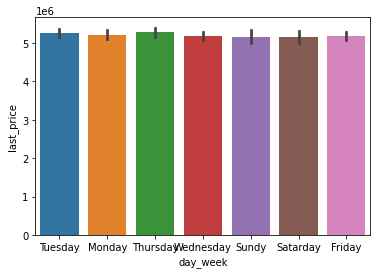

In [46]:
#преобразование дней в названия, чтобы было нагляднее видно по графику
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Satarday',6:'Sundy'}
data_short['day_week'] = data_short['day_week'].apply(lambda x: days[x])

#Найдем зависимость:

#от дня недели

seaborn.barplot(x=data_short['day_week'], y = data_short['last_price'])


#data_short.plot(x=col_2, y='last_price', kind='bar')
#data_time_placement = data_short[['day_week','day_month','day_year','price_per_square_m']]
#Найдем зависимость
#от дня недели
#data_time_placement.plot(y='day_week', x='price_per_square_m', kind='scatter', alpha=0.007, sharex=False, grid=True, figsize=(6, 6), title='Price_day_week') 

Квартиры, которые размещают с понедельника по четверг, дороже, чем те, что размещают с пятницы по воскресенье .

<AxesSubplot:xlabel='day_month', ylabel='last_price'>

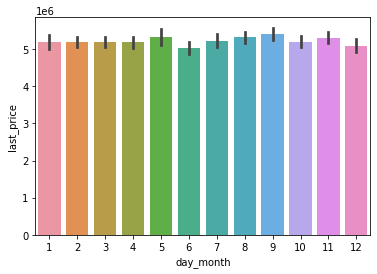

In [47]:
# от месяца размещения
seaborn.barplot(x=data_short['day_month'], y = data_short['last_price'])

Самые дешевые квартиры размещают к продаже в июне. Возможно, потому, что спрос в этот месяц самый маленький в связи с началом отпусков. Наибольшая цена квартир в августе, сентябре, ноябре, что, скорей всего, также обусловлено более высоким спросом, в августе и сентябре-перед началом учебного года, а в ноябре-перед длинными новогодними праздниками.

day_year
2015     298
2016    1781
2017    6877
2018    7174
2019    1032
Name: day_year, dtype: int64


<AxesSubplot:xlabel='day_year', ylabel='last_price'>

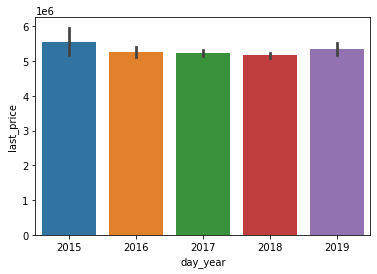

In [48]:
#Найдем зависимость
#от года
print(data_short.groupby('day_year')['day_year'].count())
seaborn.barplot(x=data_short['day_year'], y = data_short['last_price'])

Из анализируемых данных, в 2014 году продавали всего 7 квартир, что не является показательным для анализа, поэтому мы проигнорируем данные 2014 года. По остальным годам видно, что самые дорогие квартиры продавали в 2015 году, потом цена на них снизилась в течение последующих трех лет, а в 2019 году опять поднялась.

### **Анализ десяти населённых пунктов с наибольшим числом объявлений**

In [49]:
#10 населённых пунктов с наибольшим числом объявлений.

max_advert = data_short.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
data_max_adv = data_short.query('locality_name in @max_advert.index')

price_meter_max_adv_mean = round(data_max_adv['price_per_square_m'].mean(),0)
price_meter_max_adv_max = round(data_max_adv['price_per_square_m'].max(),0)
price_meter_max_adv_min = round(data_max_adv['price_per_square_m'].min(),0)

print(max_advert)
print('***********************')
print(f'Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: {price_meter_max_adv_mean} рублей')
print('***********************')
print(f'Самая высокая цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: {price_meter_max_adv_max} рублей')
print('***********************')
print(f'Самая низкая цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: {price_meter_max_adv_min} рублей')

locality_name
Санкт-Петербург      11338
поселок Мурино         480
поселок Шушары         368
Всеволожск             289
Колпино                284
поселок Парголово      271
Пушкин                 261
деревня Кудрово        248
Гатчина                230
Выборг                 179
Name: locality_name, dtype: int64
***********************
Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: 101248.0 рублей
***********************
Самая высокая цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: 199880.0 рублей
***********************
Самая низкая цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: 24440.0 рублей


### **Анализ изменения цены по степени удалённости от центра**

#### Определение центра Санкт-Петербурга

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\ayupo\AppData\Local\Temp/ipykernel_15584/2948774957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SP['cityCenters_nearest_km'] = round(data_SP['cityCenters_nearest']/1000,0)


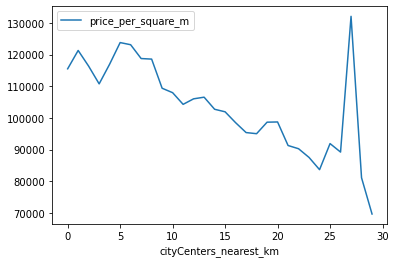

In [50]:
#Наша задача — выяснить, какая область входит в центр.
#Создадим столбец с расстоянием до центра в километрах: округлим до целых значений.
#После этого посчитаем среднюю цену для каждого километра.
#Построем график, который будет показывать, как цена зависит от удалённости от центра.
#Определите границу, где график сильно меняется, — это и будет центральная зона.
data_SP = data_short[data_short['locality_name'] == 'Санкт-Петербург']
data_SP['cityCenters_nearest_km'] = round(data_SP['cityCenters_nearest']/1000,0)
data_SP_destination = data_SP.pivot_table(index='cityCenters_nearest_km', values = 'price_per_square_m',aggfunc='mean')
print(data_SP_destination.plot())

С 6 км начинается резкое снижение цены за кв.м. Соответственно, центральная зона-это удаленность от центра на 6 км. Также наблюдается резкий рост стоимости кв.м. в примерно 27 км. от центра. Это выброс, на который не стоит обращать внимание.

In [51]:
#Выделим сегмент квартир в центре. 

data_center = data_SP[data_SP['cityCenters_nearest_km'] <= 6.0]
data_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition_new,price_per_square_m,floor_groups,square_convertion,kitchen_convertion,type_estate_meter,day_week,day_month,day_year,cityCenters_nearest_km
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,True,...,265,66872.427984,first,0.478395,0.201646,бизнес-класс,Satarday,10,2015,2.0
63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,True,...,37,169491.525424,other,0.576271,0.135593,элитная недвижимость,Tuesday,9,2018,5.0
99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.0,2,True,...,104,106666.666667,other,0.744444,0.088889,элитная недвижимость,Tuesday,9,2017,3.0
106,9,10500000.0,124.1,2017-05-25,5,3.20,4,79.4,3,True,...,6,84609.186140,other,0.639807,0.161160,бизнес-класс,Thursday,5,2017,6.0
111,4,4590000.0,40.0,2017-05-29,1,2.65,6,18.0,1,True,...,31,114750.000000,first,0.450000,0.250000,элитная недвижимость,Monday,5,2017,6.0


#### Зависимость цены квартир в центре от площади, числа комнат, удалённости от центра.

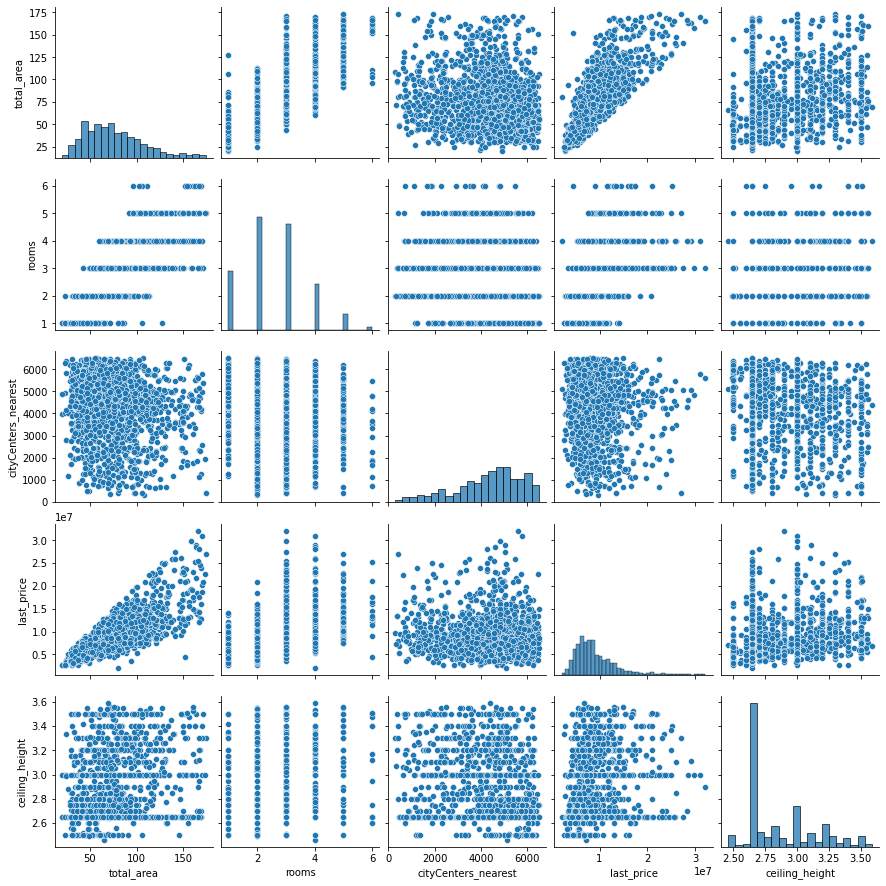

In [52]:
#Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
seaborn.pairplot(data_center[['total_area', 'rooms','cityCenters_nearest','last_price','ceiling_height']]) 
#data_center_1 = data_center [['total_area', 'price_per_square_m', 'rooms', 'ceiling_height']]
#pd.plotting.scatter_matrix(data_center_1, figsize=(10,10),alpha=0.3);

Итак, с ростом площади ростет цена, зависимость прямая. Самые дорогие-это трехкомнатные квартиры, 4,5,6-ти комнатные дешевле. Однако, можно утверждать, что с увеличение числа комнат растет цена. 
Квартиры на растоянии 4-5 км стоят дороже, чем ближе к центру. Возможно, в самом центре целевая аудитория-туристы, поэтому меньше инфраструктуры для семей. Цена растет с увеличением высоты потолка.

In [53]:
#найдем среднии значения и медианы по ['total_area', 'rooms','cityCenters_nearest','last_price'] в центре
col_1 = ['total_area', 'rooms','cityCenters_nearest','ceiling_height','last_price']
for column in col_1:
    median_1 = data_center[column].median()
    mean_1 = data_center[column].mean()
    display(f'средняя \'{column}\' равна {median_1}')
    display(f'медиана \'{column}\' равна {mean_1}')

"средняя 'total_area' равна 71.0"

"медиана 'total_area' равна 75.97692353643966"

"средняя 'rooms' равна 2.0"

"медиана 'rooms' равна 2.5812425328554363"

"средняя 'cityCenters_nearest' равна 4581.5"

"медиана 'cityCenters_nearest' равна 4293.322580645161"

"средняя 'ceiling_height' равна 2.7"

"медиана 'ceiling_height' равна 2.8628853046594958"

"средняя 'last_price' равна 7988000.0"

"медиана 'last_price' равна 8930019.989844684"

#### Зависимость цены от этажа

              mean_last_price  median_last_price
floor_groups                                    
first               7007078.0          5999000.0
last                9012004.0          7992500.0
other               9277266.0          8350000.0


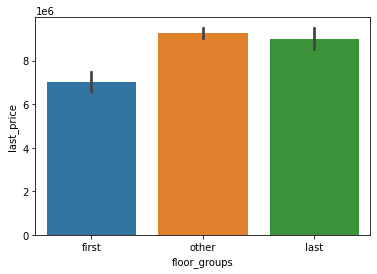

In [54]:
mean_last_price = round(data_center.groupby(['floor_groups']).agg({'last_price':['mean','median']}),0)
mean_last_price.columns = ['mean_last_price','median_last_price']
print(mean_last_price)
seaborn.barplot(x=data_center['floor_groups'], y = data_center['last_price']);

В центре в отличае от среднего по всему Санкт-Петербургу последние этажи стоят почти также дорого, как прочие. А вот первые этажи также самые дешевые.

#### Средний срок продажи квартир в центре

318.0

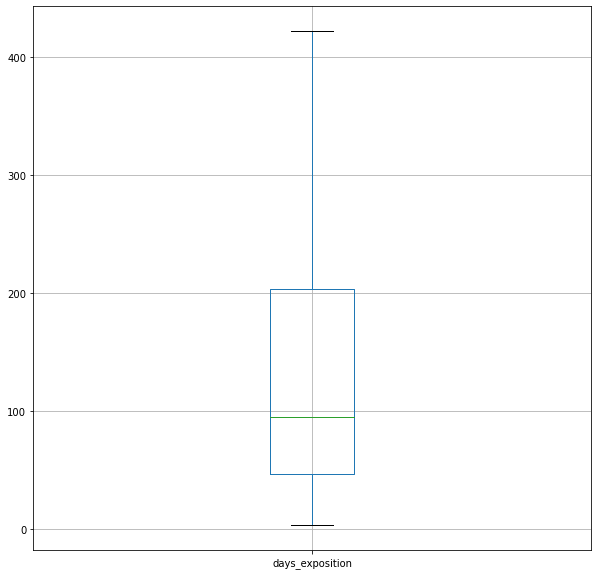

In [55]:
data_center.boxplot(['days_exposition'], figsize=(10,10))
data_center['days_exposition'].quantile(0.9)

In [56]:
print(data_center['days_exposition'].max())
print(data_center['days_exposition'].median())
print(data_center['days_exposition'].mean())

422.0
95.0
134.56989247311827


В среднем продажа квартиры занимает от 10 до 180 дней. Медиана - 95 дней, а среднее 134 дней.Если объект продали до медианы (95 дней), то можно считать, что продажи прошли очень быстро. Долгие продажи, например, те, что заняли более 318 дней. Максимальное время продажи- 422 дней (это более года), такой срок продажи- долгий, но и такое бывает, если продавать далеко не по рыночной цене.

#### Зависимость цены от даты размещения объявления

<AxesSubplot:xlabel='day_week', ylabel='last_price'>

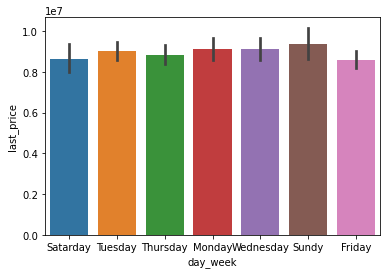

In [57]:
# посмотрим зависимость от дня недели
seaborn.barplot(x=data_center['day_week'], y = data_center['last_price'])

По самой высокой цене размещают объявления о продаже квартир в среду и воскресенье, а по самой низкой-в пятницу и субботу.

<AxesSubplot:xlabel='day_month', ylabel='last_price'>

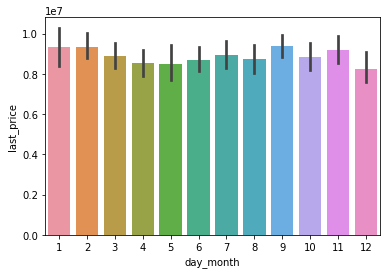

In [58]:
# посмотрим зависимость от месяца размещения объявления
seaborn.barplot(x=data_center['day_month'], y = data_center['last_price'])

Самые дешевые квартиры размещают в мае и декабре, а самые дорогие в январе, феврале и сентябре. Квартиры в центре дороже, чем в среднем по Санкт-Петербургу. Возможно, их приобретают больше в качестве инвестиций, чем для прожавания. В конце декабря обычно выплачивают годовые бонусы, это может быть причиной увеличения спроса на объекты инвестирования в последующие месяцы, а именно в январе и феврале. Увеличенные спрос на квартиры в сентябре схож со спросом по всему Санкт-Петербургу.

day_year
2015     38
2016    219
2017    713
2018    626
2019     78
Name: day_year, dtype: int64


<AxesSubplot:xlabel='day_year', ylabel='last_price'>

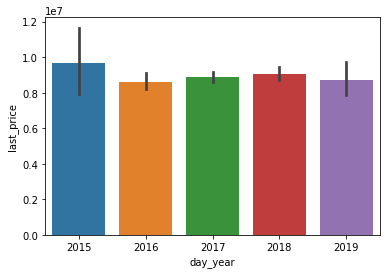

In [59]:
# посмотрим зависимость от года размещения объявления
print(data_center.groupby('day_year')['day_year'].count())
seaborn.barplot(x=data_center['day_year'], y = data_center['last_price'])

Самые высокие цены были в 2015 году, которые сильно упали в 2016. В последующих годах наблюдается постепенный рост, хотя в 2019 году цены так и не достигли уровня 2015 года. Сильное падение цен в 2016 году можно связать с падением спроса из-за снижения платежеспособности россиян, ослаблением рубля и ухудшением экономической ситуации в стране из-за начала введения масштабных санкций со стороны США и Евросоюза.

## **Выводы**
#Сделаем выводы. Отличаются ли они от общих выводов по всей базе.

В настоящем проекте мы анализировали данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Мы определили рыночную стоимость объектов недвижимости. В результате чего это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

При подготовке проекта были изучены и заменены ряд пропущенных значений. 
- Так например, количество пропущенных балконов было заменено на 0, ведь, скорей всего, если человек не указал число балконов, то их просто нет. 
-Также мы заменили медианой пропущенные значения kitchen_area, а living_area вычисллили как living_area=(total_area-kitchen_area). 
-Удалили все данные с пропущенными значениями locality_name, т.к. невозможно определить замену пропущенным данным, а данный показатель важен для определения рыночной стоимости, кроме того, их всего 49, т.е. очень мало, поэтому это не повлияет на наш анализ. 
-Заменили пропущенные значения ceiling_height, на медиану. Замена на медиану, а не средними значениями, т.к. для широкого круга объектов вытота потолка некоторых объетов может существенно отличаться от основной массы, тогда среднее значение сильно сместит результат. Скорей всего, те, кто имеет высокие потолки, указали это в объявлениях. Остальные просто не сочли важным заполнение данной информации. Поэтому медиана вполне подойдет для пропущенных значений высоты потолка.
-days_exposition— сколько дней было размещено объявление (от публикации до снятия), заменили на median days_exposition в зависимости от места расположения, предполагая, что спрос на объекты схож по районам. Скорее всего, данные не заполнены по причине того, что на дату выгрузки отчета объявления еще не были сняты с публикации. После преобразования осталось 80 пропущенных значений. Их мы заменим медианой по всей датафрэйм, т.к. количество оставшихся пропусков не существенно, то это не должно сильно повлиять на анализ. 
-Отсутствие общего количества этажей заменим на медиану по району, т.к. в районах обычно этажность домов примерно одинаковая. Те этажи в объявление, которые получились после преобразования выше, чем количество этажей в доме (32 штуки), заменим на этаж в объявлении.
-Заменили пропущенные значения 'airports_nearest','cityCenters_nearest' на медиану, расчитанную по названию населенного пункта, полагая, что населенные пункты имеют небольшую территория и, взяв медиану, погрешность будет небольшой. Данной обработкой получилось заменить не все пропущенные данные, но большую часть.

Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми.

### Рыночные параметры объектов недвижимости в Санкт-Петербурге и соседних населённых пунктах

В результате исседования были получены следующие выводы:

- В среднем продажа квартиры занимает от 10 до 200 дней. Медиана - 95 дней, а среднее 181 дней.Если объект продали до медианы (95 дней), то можно считать, что продажи прошли очень быстро. Долгие продажи, например, те, что заняли более 459 дней. Максимальное время продажи- 1580 дней (это более 4 лет), такой срок продажи- необычно долгий, но и такое бывает, если продавать далеко не по рыночной цене. Наблюдаются аномаланые всплески на 45, 60, 90 днях продажи. Это может быть связано со сроком размещения объявления, определяемым системой. Например, при первоначальном размещении объявление размещается на 45 дней. Затем необходимо ручное продлении. Продлевается срок до 60 дней, потом объявление снимается с публикации до того, пока его вновь не активируют в 90 дней. Т.е. в эти дни объявления снимаются с публикации автоматически, потом может их уже не продлевают, поэтому вплески.
- с ростом площади ростет цена, зависимость прямая. 
- Чем дальше от центра, тем цена ниже. 
- Чем больше комнат, тем дороже стоит квартира.
- Цена растет с увеличением высоты потолка.
- Самые дешевые квартиры на первом этаже, потом на последнем. А на других этажах квартиры, как правило, дороже всего.
- Квартиры, которые размещают с понедельника по четверг, дороже, чем те, что размещают с пятницы по воскресенье .
- Самые дешевые квартиры размещают к продаже в июне. Возможно, потому, что спрос в этот месяц самый маленький в связи с началом отпусков. Наибольшая цена квартир в августе, сентябре, ноябре, что, скорей всего, также обусловлено более высоким спросом, в августе и сентябре-перед началом учебного года, а в ноябре-перед длинными новогодними праздниками.
- Самые дорогие квартиры продавали в 2015 году, потом цена на них снизилась в течение последующих трех лет, а в 2019 году опять поднялась.

Также мы определили 10 населённых пунктов с наибольшим числом объявлений и проанализировали данные по ним. Самые активные в продаже квартир районы:
locality_name
- 1) Санкт-Петербург      13187
- 2) поселок Мурино         485
- 3) поселок Шушары         400
- 4) Всеволожск             345
- 5) Пушкин                 321
- 6) Колпино                314
- 7) поселок Парголово      296
- 8) Гатчина                268
- 9) деревня Кудрово        248
- 10) Выборг                 206

***********************
Средняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: 103065.0 рублей
***********************
Самая высокая цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: 199880.0 рублей
***********************
Самая низкая цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений: 24075.0 рублей

### Рыночные параметры объектов недвижимости в центре Санкт-Петербурга

Далее мы определили центральный район Санкт-Петербурга. Было установлено, что стоимость метра жилья начинает снижаться с отметки в 6 км. Поэтому мы приняли допущение, что центральный район находиться в радиусе 6 км. Мы провели анализ центрального района. В результате анализа выявили следующее:

- с ростом площади ростет цена, зависимость прямая. 
- Самые дорогие-это трехкомнатные квартиры, 4,5,6-ти комнатные дешевле. Однако, можно утверждать, что с увеличение числа комнат растет цена. 
- Квартиры на растоянии 4-5 км стоят дороже, чем ближе к центру. Возможно, в самом центре целевая аудитория-туристы, поэтому меньше инфраструктуры для семей. Цена растет с увеличением высоты потолка.
- В центре в отличае от среднего по всему Санкт-Петербургу последние этажи стоят почти также дорого, как прочие. А вот первые этажи также самые дешевые.
- В среднем продажа квартиры занимает от 10 до 180 дней. Медиана - 95 дней, а среднее 134 дней.Если объект продали до медианы (95 дней), то можно считать, что продажи прошли очень быстро. Долгие продажи, например, те, что заняли более 318 дней. Максимальное время продажи- 422 дней (это более года), такой срок продажи- долгий, но и такое бывает, если продавать далеко не по рыночной цене.
- По самой высокой цене размещают объявления о продаже квартир в среду и воскресенье, а по самой низкой-в пятницу и субботу.
- Самые дешевые квартиры размещают в мае и декабре, а самые дорогие в январе, феврале и сентябре. Квартиры в центре дороже, чем в среднем по Санкт-Петербургу. Возможно, их приобретают больше в качестве инвестиций, чем для прожавания. В конце декабря обычно выплачивают годовые бонусы, это может быть причиной увеличения спроса на объекты инвестирования в последующие месяцы, а именно в январе и феврале. Увеличенные спрос на квартиры в сентябре схож со спросом по всему Санкт-Петербургу.
- Самые высокие цены были в 2015 году, которые сильно упали в 2016. В последующих годах наблюдается постепенный рост, хотя в 2019 году цены так и не достигли уровня 2015 года. Сильное падение цен в 2016 году можно связать с падением спроса из-за снижения платежеспособности россиян, ослаблением рубля и ухудшением экономической ситуации в стране из-за начала введения масштабных санкций со стороны США и Евросоюза.

### Сравнение рыночных параметров объектов в центре с общим анализом по всему Санкт-Петербургу

In [60]:
# у нас есть нужные факторы которые нам нужно посчитать и сравнить
col_ = ['total_area', 'last_price', 'rooms', 'days_exposition', 'ceiling_height','price_per_square_m','cityCenters_nearest']

# строим таблицу
display(pd.DataFrame([data_center[col_].mean(), data_short[col_].mean()], index = ['центр', 'все районы']).round(2))

,total_area,last_price,rooms,days_exposition,ceiling_height,price_per_square_m,cityCenters_nearest
центр,75.98,8930019.99,2.58,134.57,2.86,119841.24,4293.32
все районы,54.94,5217196.35,1.96,114.90,2.67,93867.42,14857.92


Мы сравнили результаты по центру с анализом по всему Санкт-Петербургу и соседних населённых пунктах. В итоге, можем сделать следующие выводы:

- в центре больше продают квартир с большей площадью. Так, средняя площадь квартиры в центре-78 кв.м., а во всех районах-56 кв.м.
-в центре квартиры стоят дороже. Так, средняя стоимость квартиры в центре-9 млн.руб, а во всех районах-5 млн.руб.
-в центре в осносном продают большие трехкомнатные квартиры, а в остальных районах больше продают двухкомнатных квартир.
-квартиры в центре продаются немного дольше, скорей всего, из-за более высокой стоимости. Так, квартиры в центре в среднем продают 111 дней, а во всех районах-98 дней. 
-высота потолков квартир в центре немного выше по сравнению со всеми районами, а именно около 2.9 м. и 2.7 м. соответственно.
-квартиры в центре в основном продают на расстоянии 4 км от центра, а среднее растояние от центра всех районов-15 км.

In [61]:
# у нас есть нужные датафреймы:
data_center
data_short

# у нас есть нужные факторы которые нам нужно посчитать и сравнить
col_ = ['total_area', 'last_price', 'rooms', 'days_exposition', 'ceiling_height']

# строим таблички
display(pd.DataFrame([data_center[col_].mean(), data_short[col_].mean()], index = ['центр', 'все районы']).round(2))


# или с describe():

display(data_center[col_].describe().round(2))
display(data_short[col_].describe().round(2))

,total_area,last_price,rooms,days_exposition,ceiling_height
центр,75.98,8930019.99,2.58,134.57,2.86
все районы,54.94,5217196.35,1.96,114.90,2.67


,total_area,last_price,rooms,days_exposition,ceiling_height
count,1674.00,1674.00,1674.00,1674.00,1674.00
mean,75.98,8930019.99,2.58,134.57,2.86
std,30.69,4173818.03,1.12,111.82,0.27
min,20.30,2100000.00,1.00,3.00,2.46
25%,52.00,6100000.00,2.00,46.00,2.65
50%,71.00,7988000.00,2.00,95.00,2.70
75%,94.00,10737500.00,3.00,203.00,3.00
max,173.60,32100000.00,6.00,422.00,3.59


,total_area,last_price,rooms,days_exposition,ceiling_height
count,17162.00,17162.00,17162.00,17162.00,17162.00
mean,54.94,5217196.35,1.96,114.90,2.67
std,22.02,3059655.27,0.92,103.06,0.16
min,20.10,630000.00,1.00,1.00,2.45
25%,39.00,3400000.00,1.00,39.00,2.60
50%,49.88,4450000.00,2.00,79.00,2.65
75%,65.00,6140519.75,3.00,166.00,2.70
max,174.00,32100000.00,6.00,424.00,3.59
